In [1]:
import pandas as pd
import numpy as np

In [2]:
df_public = pd.read_csv("public_transportation_data.csv")

In [3]:
df_public["start_date"] = pd.to_datetime(df_public["start_date"])
df_public["end_date"] = pd.to_datetime(df_public["end_date"])
df_public["Departure"] = df_public["start_date"].dt.hour
df_public["Arrival"] = df_public["end_date"].dt.hour

In [4]:
df_hour = df_public[["Unnamed: 0", "Departure", "Arrival"]]
df_hour = df_hour.melt(id_vars=["Unnamed: 0"], value_name="Hour", var_name="Departure")

In [5]:
df_hour = df_hour.dropna(subset="Hour")

In [6]:
df_hour = df_hour.sample(n=100000, random_state=42)

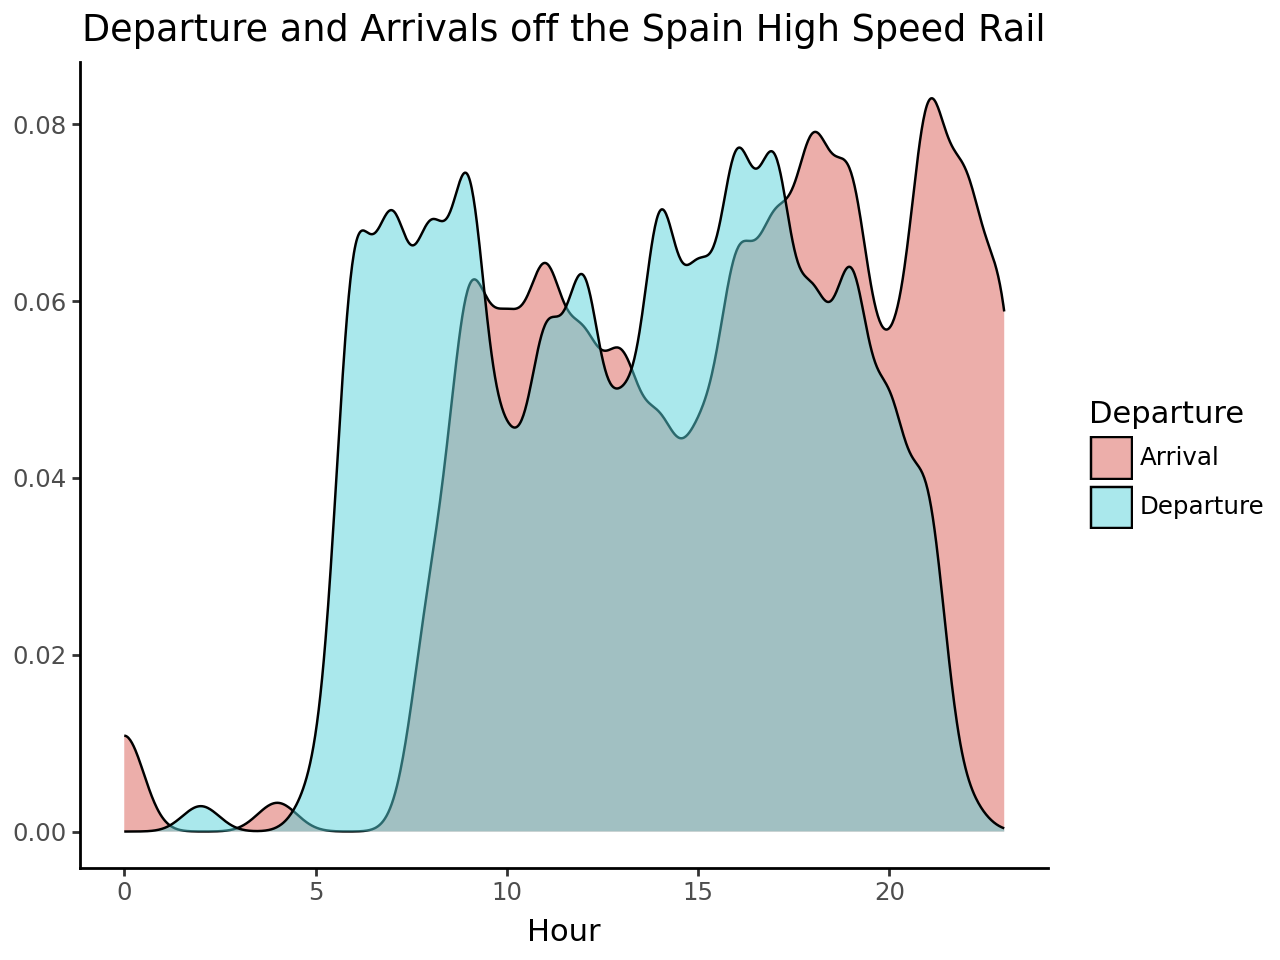

In [13]:
from plotnine import ggplot, aes, geom_density, theme_classic, labs

(ggplot(df_hour,
aes(x = "Hour", fill = "Departure"))
+ geom_density(alpha=0.5)
+ theme_classic()
+ labs(x="Hour", y="", title="Departure and Arrivals off the Spain High Speed Rail")
)

In [16]:
df_public_sample = df_public.sample(n=100000, random_state=42)

C:\Users\morag\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 12048 rows containing non-finite values.


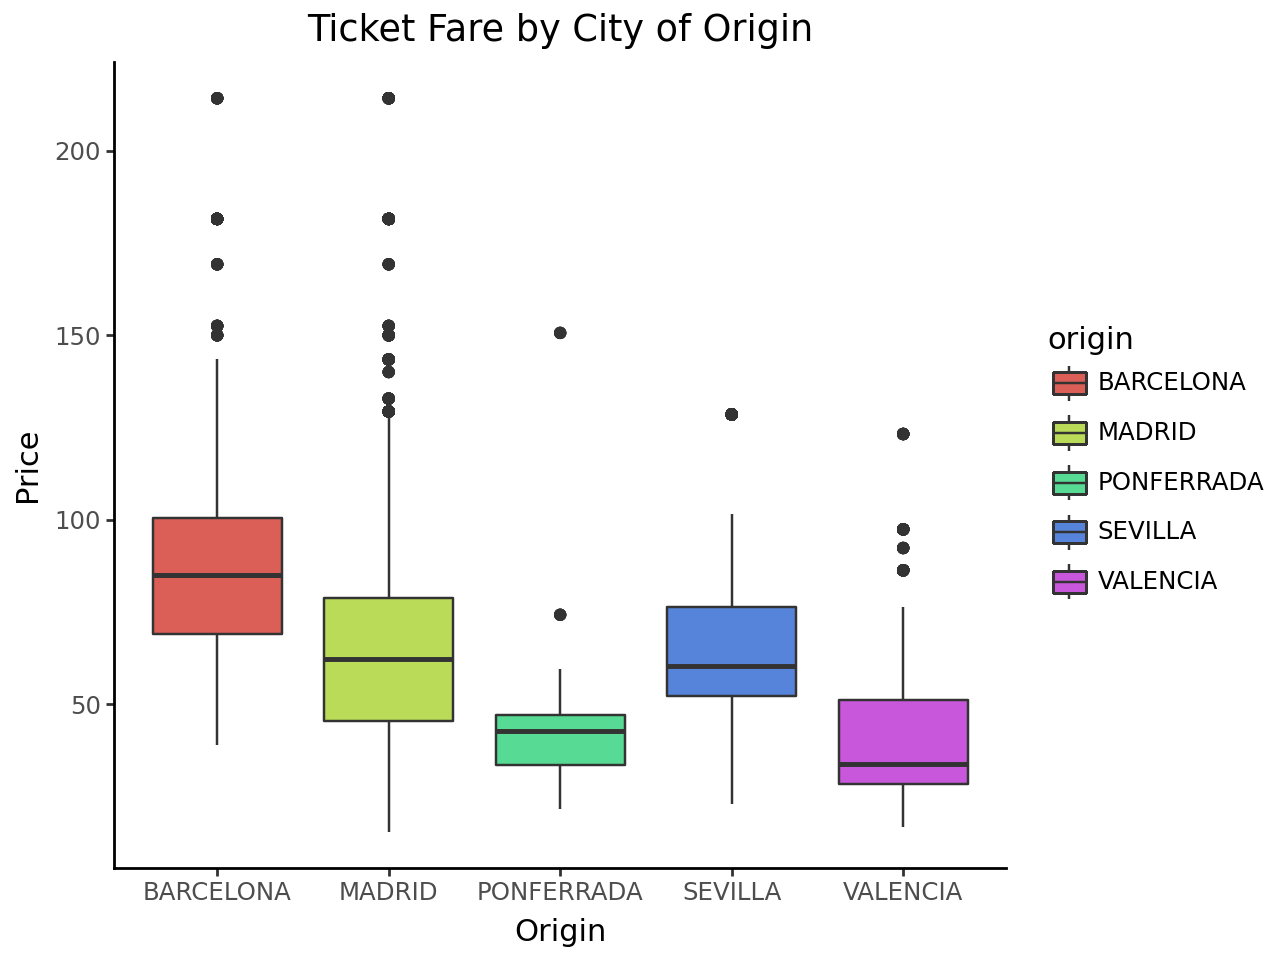

In [29]:
from plotnine import geom_boxplot, scale_x_discrete, guides

(ggplot(df_public_sample,
aes(x = "origin", y = "price", fill="origin"))
+ geom_boxplot()
+ theme_classic()
+ scale_x_discrete()
+ guides(fill=None)
+ labs(x="Origin", y="Price", title="Ticket Fare by City of Origin")
)


In [44]:
df_public["Duration"] = abs(df_public["Arrival"] - df_public["Departure"])

In [39]:
df_public_sample = df_public_sample[df_public_sample["Duration"] < 11]

In [52]:
df_public.groupby("origin")[["price", "Duration"]].mean().reset_index().rename(columns={'origin': 'Origin', 'price': 'Mean Price', 'Duration': 'Mean Duration'})

,Origin,Mean Price,Mean Duration
0,BARCELONA,84.671718,3.562944
1,MADRID,64.071365,3.266439
2,PONFERRADA,42.004859,5.331559
3,SEVILLA,62.470221,3.028152
4,VALENCIA,39.852544,3.165894


In [53]:
df_public.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Departure,Arrival,Duration
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo,6,9,3
1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo,7,9,2
2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo,7,9,2
3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo,8,10,2
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo,8,11,3
